# Exploratory Data Analysis (EDA)

## Project Scope:

## Welcome to Exploratory Data Analysis (EDA)

Our goal with this lecture is to **"get to know"** the data. Try to learn as much about the data as possible, but don't spend too much time and get stuck on this step. You will probably need to do ad-hoc data exploration later. Remember, the **CRISP-DM** process is iterative.

#### Import the libraries we need.

In [2]:
# Pandas for Data Manipulation
import pandas as pd

# Matplotlib for visualization
import matplotlib.pyplot as plt

# display plots in the notebook
%matplotlib inline 

# Seaborn for easier visualization
import seaborn as sns

* `%matplotlib inline` helps plot the chart without having to use `plt.show( )` everytime. This is useful in Jupyter, but in IDE' like Spyder, we have to do `plt.show( )` to see the chart.

#### Import the dataset.

In [3]:
# Load 'real_estate.csv' in a pandas dataframe 'df'
#df = pd.read_csv('2019-22_ATTENDANCE_DATA.csv')

df = pd.read_excel('2019-22_ATTENDANCE_DATA.xlsx')

The first step to understanding your dataset is to display its basic information. This will give you a high-level understanding of your dataset's structure, features, and values.

In [4]:
# print the dataset using .head()
df.head()

,ATTDATE,CC,YearAligned,WeekAligned,DayAligned,WorkDay,StatDay,CITY,POSTAL_CODE,OtherPaidAbences,PlannedAbsences,UnplannedAbsences,UnpaidAbsences,ScheduledHours,Target
0,2019-07-15,100712,2019,29,Mon,Yes,NaN,RED DEER,T4P 3E8,0.00,60.00,16.0,4.00,412.54,0.806079
1,2019-07-12,100712,2019,28,Fri,Yes,NaN,RED DEER,T4P 3E8,0.00,72.00,36.0,0.00,407.99,0.735288
2,2019-11-08,102628,2019,45,Fri,Yes,NaN,BROSSARD,J4W 0A4,1.75,51.23,24.0,24.00,446.30,0.773740
3,2019-05-24,651222,2019,21,Fri,Yes,NaN,VICTORIA,V9B 3T0,16.00,104.00,38.9,17.38,687.40,0.743555
4,2019-02-15,102628,2019,7,Fri,Yes,NaN,BROSSARD,J4W 0A4,9.75,68.27,17.4,8.00,453.20,0.771801


The purpose of displaying examples from the dataset is not to perform rigorous analysis. Instead, try to get a qualitative "feel" for the dataset.

Answer these questions below:

* Do the columns make sense?
* Do the values in those columns make sense?
* Is missing data going to be a big problem based on an eyeball test?
* What types of classes are there?

Spend a couple minutes looking over the data to get familiar with it.

Finally, it's also helpful to look at the last 5 rows of data.
* Sometimes datasets will have **corrupted data** hiding at the very end (depending on the data source).
* It never hurts to double-check.

In [5]:
# Display the last 5 rows of data.
df.tail(5)

,ATTDATE,CC,YearAligned,WeekAligned,DayAligned,WorkDay,StatDay,CITY,POSTAL_CODE,OtherPaidAbences,PlannedAbsences,UnplannedAbsences,UnpaidAbsences,ScheduledHours,Target
1988,2022-03-08,651222,2022,10,Tue,Yes,NaN,VICTORIA,V9B 3T0,2.0,36.00,54.00,10.00,687.38,0.851610
1989,2022-07-22,102628,2022,29,Fri,Yes,NaN,BROSSARD,J4W 0A4,4.6,84.32,24.00,8.00,434.61,0.721774
1990,2022-05-19,102628,2022,20,Thu,Yes,NaN,BROSSARD,J4W 0A4,8.0,64.97,8.00,0.00,400.90,0.798029
1991,2022-12-16,651222,2022,50,Fri,Yes,NaN,VICTORIA,V9B 3T0,88.0,104.00,64.53,13.47,839.00,0.678188
1992,2022-03-24,102628,2022,12,Thu,Yes,NaN,BROSSARD,J4W 0A4,16.0,56.00,24.53,16.00,426.44,0.736118


In [6]:
# look at the shape, or the dimensions of the dataset using the '.shape' attribute
# Dataframe dimensions
#camel case - PropertyTax; snake case: property_tax
df.shape 

(1993, 15)

As you can see, we have **1993 observations and 15 features**. 

### Next, let's take a look at the data types of our features.

In [7]:
# Print column datatypes using .dtypes
df.dtypes

ATTDATE              datetime64[ns]
CC                            int64
YearAligned                   int64
WeekAligned                   int64
DayAligned                   object
WorkDay                      object
StatDay                      object
CITY                         object
POSTAL_CODE                  object
OtherPaidAbences            float64
PlannedAbsences             float64
UnplannedAbsences           float64
UnpaidAbsences              float64
ScheduledHours              float64
Target                      float64
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1993 entries, 0 to 1992
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   ATTDATE            1993 non-null   datetime64[ns]
 1   CC                 1993 non-null   int64         
 2   YearAligned        1993 non-null   int64         
 3   WeekAligned        1993 non-null   int64         
 4   DayAligned         1993 non-null   object        
 5   WorkDay            1993 non-null   object        
 6   StatDay            5 non-null      object        
 7   CITY               1993 non-null   object        
 8   POSTAL_CODE        1993 non-null   object        
 9   OtherPaidAbences   1993 non-null   float64       
 10  PlannedAbsences    1993 non-null   float64       
 11  UnplannedAbsences  1993 non-null   float64       
 12  UnpaidAbsences     1993 non-null   float64       
 13  ScheduledHours     1993 non-null   float64       
 14  Target  

Now check to see if any data types are incorrect.

* Check if any numeric features should be categorical instead based on what you know about the dataset.
* Or, check if any categorical features should be numeric instead.
* It's fine if you are unsure about some columns, as we'll continue to explore them.

## Distributions

One of the most enlightening data exploration tasks is plotting the distributions of your features.

**Here are a few things to look out for:**
* Distributions that don't make sense (e.g a large spike in houses with 10 bedrooms)
* Potential outliers that don't make sense
* Sparse data
* Numeric features that should be categorical
* Features that should be binary
* Boundaries that don't make sense (e.g. percent values above 100 or below 0)

The easiest way to display distributions of numeric features is by using seaborn' Pairplot.
* Seaborn comes with a `.pairplot()` function that plots the distributions of all of the numeric features.
* Also call `plt.show()` to clear all of the text "residue" and just keep the plot.

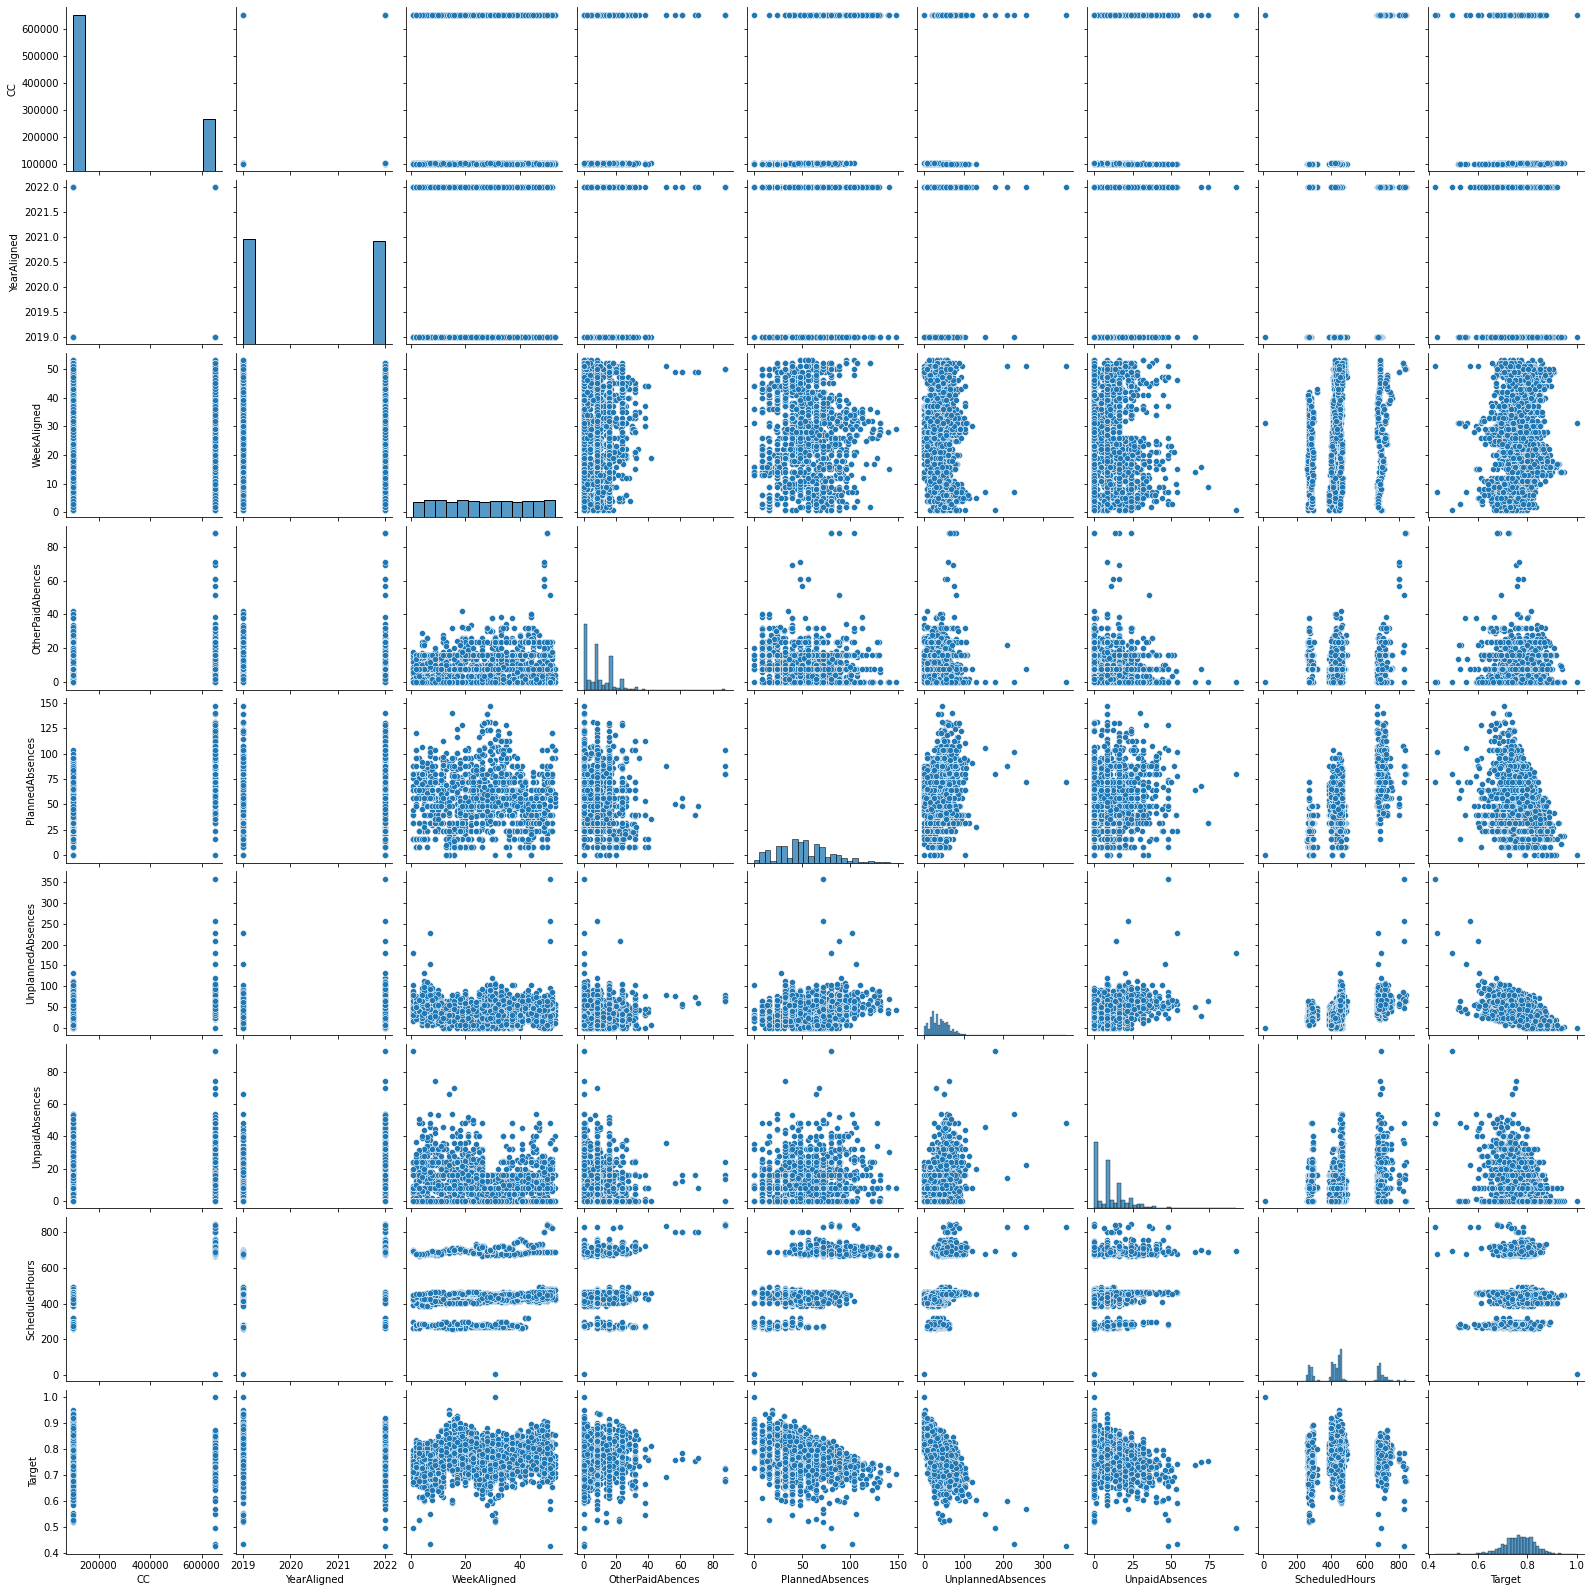

In [9]:
# Plot histogram grid using seaborn pairplot
# Clear the text "residue" and show the plot, also need to fix the data before visualize
sns.pairplot(df)
plt.show()

### Display the formal summary statistics.
* Pandas comes with a `.describe()` function for summary statistics.

#### Display summary statistics for the numerical features again. Then, answer the following questions:
1. In our dataset, what is the earliest transaction year (**year_sold**)?
2. Among all properties in our dataset, what is the maximum number of bedrooms (**beds**)?
3. In our dataset, do we see more variance in the number of bedrooms (**beds**) or the number of bathrooms (**baths**)?

In [10]:
# Summarize numerical features
df.describe()

,CC,YearAligned,WeekAligned,OtherPaidAbences,PlannedAbsences,UnplannedAbsences,UnpaidAbsences,ScheduledHours,Target
count,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000
mean,239006.435524,2020.481184,26.542398,9.358244,51.273206,38.373036,10.872755,471.001475,0.765550
std,238292.722178,1.500258,15.076756,9.561803,26.191146,25.226073,11.142766,147.790131,0.061426
min,100636.000000,2019.000000,1.000000,0.000000,0.000000,0.000000,0.000000,8.000000,0.425812
25%,100712.000000,2019.000000,13.000000,1.750000,32.000000,21.300000,0.000000,405.660000,0.727620
50%,102628.000000,2019.000000,26.000000,8.000000,48.000000,34.480000,8.000000,446.410000,0.768199
75%,651222.000000,2022.000000,40.000000,16.000000,68.000000,53.000000,16.000000,491.980000,0.808819
max,651222.000000,2022.000000,53.000000,88.000000,147.080000,358.000000,92.730000,845.500000,1.000000


In [11]:
df.describe(include='object')

,DayAligned,WorkDay,StatDay,CITY,POSTAL_CODE
count,1993,1993,5,1993,1993
unique,6,2,3,4,4
top,Thu,Yes,St-Jean Baptiste,VICTORIA,V9B 3T0
freq,420,1990,3,499,499


## <span style="color:RoyalBlue">Segmentations</span>

Segmentations are powerful ways to cut the data to observe the relationship between **categorical features and numeric features**.

<AxesSubplot:title={'center':'ScheduledHours'}, xlabel='WorkDay'>

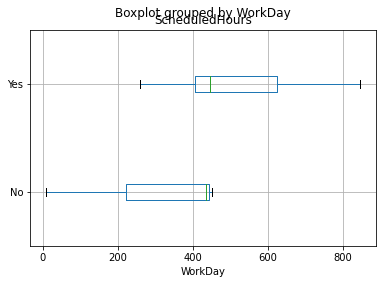

In [12]:
df.boxplot(by='WorkDay',column = 'ScheduledHours',vert=False)

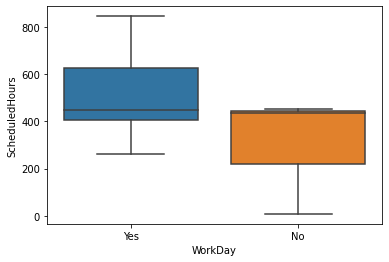

In [14]:
# Plot a box plot of ScheduledHours by WorkDay using seaborn
sns.boxplot(x='WorkDay', y='ScheduledHours', data=df)
plt.show()

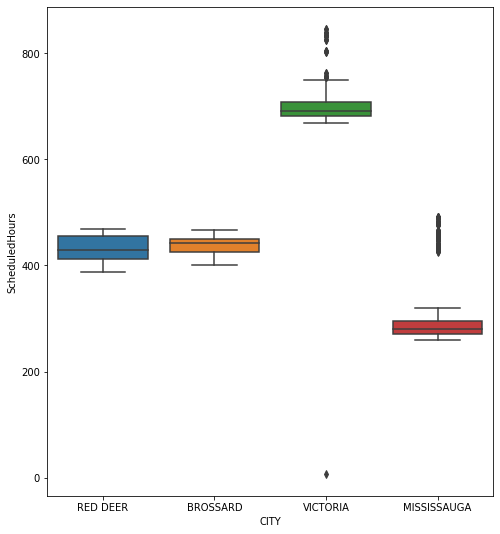

In [15]:
plt.figure(figsize=(8,9))
sns.boxplot(x='CITY', y='ScheduledHours', data=df)
plt.show()

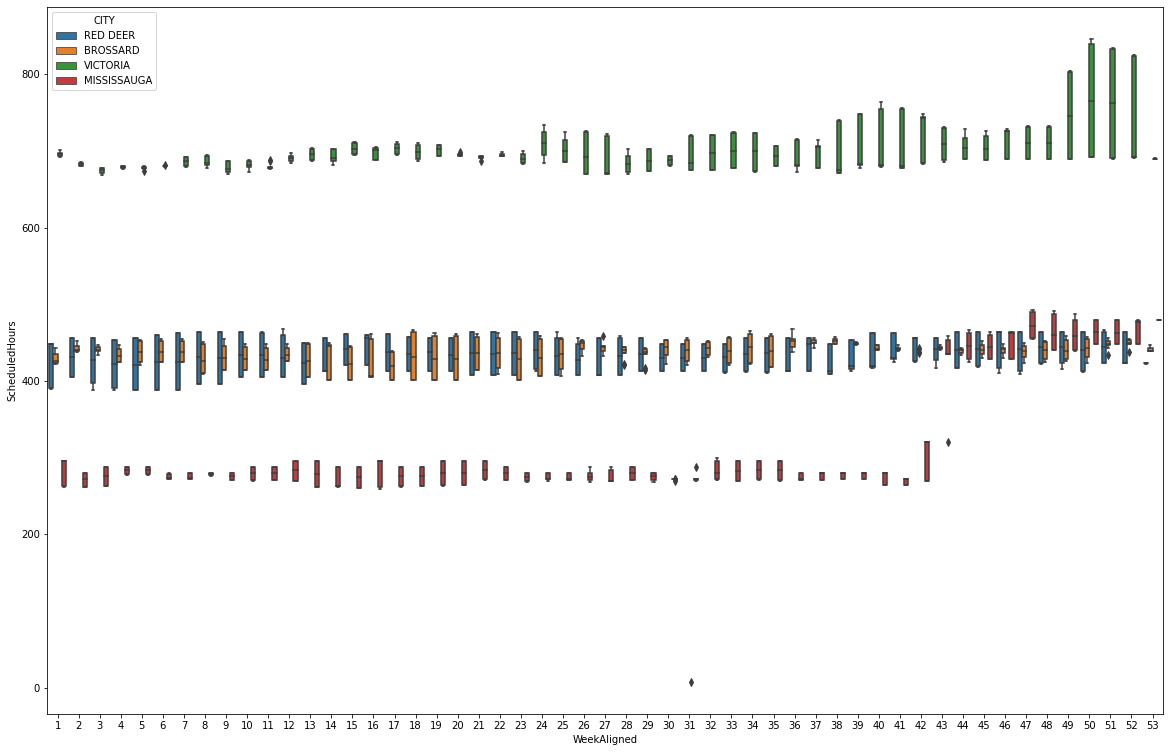

In [16]:
plt.figure(figsize=(20,13))
sns.boxplot(x='WeekAligned', y='ScheduledHours', hue='CITY', data=df)
plt.show()

### <span style="color:crimson">Note: Take care of these outliers </span>

## Correlations</span>

Finally, let's take a look at the relationships between numeric features and other numeric features.

**Correlation is a value between -1 and 1 that represents how closely values for two separate features move in unison.**
* Positive correlation means that as one feature increases, the other increases.
    <br>E.g. a child's age and their height.
* Negative correlation means that as one feature increases, the other decreases.
    <br>E.g. hours spent studying and number of parties attended.
* Correlations near -1 or 1 indicate a strong relationship.
* Those closer to 0 indicate a weak relationship.
* 0 indicates no relationship.

Pandas DataFrames come with a useful function for calculating correlations: `.corr()`

In [28]:
# Calculate correlations between numeric features
df.corr()

,CC,YearAligned,WeekAligned,OtherPaidAbences,PlannedAbsences,UnplannedAbsences,UnpaidAbsences,ScheduledHours
CC,1.000000,-0.000858,0.000029,-0.001852,0.603693,0.512390,0.383598,0.890866
YearAligned,-0.000858,1.000000,-0.019423,-0.001320,-0.048874,0.289676,0.244916,0.055625
WeekAligned,0.000029,-0.019423,1.000000,0.191604,-0.045675,0.007145,-0.053180,0.121760
OtherPaidAbences,-0.001852,-0.001320,0.191604,1.000000,-0.185483,-0.080617,-0.173750,-0.035694
PlannedAbsences,0.603693,-0.048874,-0.045675,-0.185483,1.000000,0.261155,0.180218,0.683965
UnplannedAbsences,0.512390,0.289676,0.007145,-0.080617,0.261155,1.000000,0.387857,0.509254
UnpaidAbsences,0.383598,0.244916,-0.053180,-0.173750,0.180218,0.387857,1.000000,0.409533
ScheduledHours,0.890866,0.055625,0.121760,-0.035694,0.683965,0.509254,0.409533,1.000000


The variable now has a big dataframe that contains all of the correlations between numeric features.

**Let's try to visualize the correlation grid and make it easier.**
* Seaborn's helpful `sns.heatmap()` function comes handy.
* The `cmap= argument` controls the color palette used in the heatmap. We will set it to the value of `RdBu_r`. So positive correlation values will be red and negative correlation values will be blue.
* By the way, what do you think will happen if you put in  `cmap=RdBu` instead of `RdBu_r`? Go ahead and try this out in your Workbook!

<AxesSubplot:>

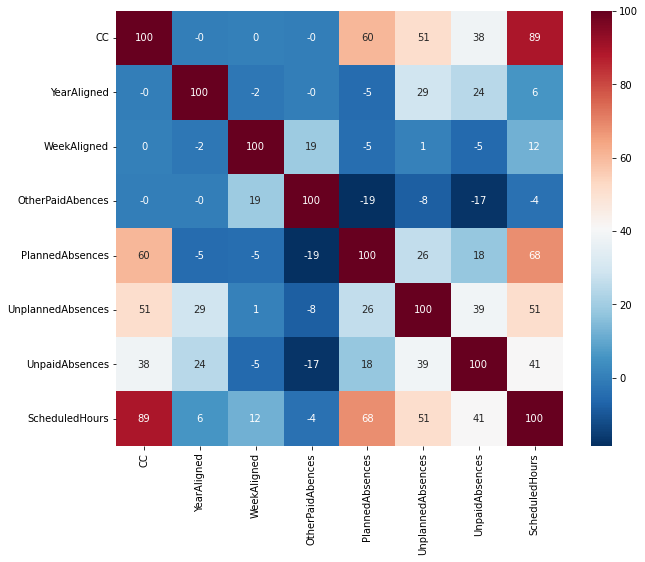

In [29]:
# Calculate correlations between numeric features
# Plot heatmap of correlations
plt.figure(figsize=(10,8))
sns.heatmap(df.corr()*100,annot = True, cmap='RdBu_r', fmt='.0f') #颜色显示为了color blind benefit

Before jumping to the next module, I would recommend going back and reviewing the charts you made. This time, since you've already created them, you can move through more quickly and really start to understand the **story** behind the data.